In [1]:
from latentmi import lmi
import pandas as pd
import scanpy as sc
from data_utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
adata = sc.read_h5ad('../data/PBMC_CITEseq_Q1.000_rep0.h5ad')
seen, held_out = split_ad(adata, frac=0.75)

In [3]:
qualities = np.logspace(-3, 0, 10)
replicates = 1

d = {
    "Model" : [],
    "UMI per cell" : [],
    "Quality" : [],
    "MI" : [],
}

for qual in qualities:
    for r in range(replicates):
        
        print(f"Quality: {qual}, Replicate: {r}")
        df = pd.read_csv(f"embeddings/PBMC_CITEseq/PBMC_CITEseq_G_Q{qual:.3f}_rep{r}.csv", index_col=0)
        pmis, _, _ = lmi.estimate(df.loc[held_out.obs.index.values], held_out.obsm['protein_counts'])

        d['Model'].append("Geneformer")
        d['UMI per cell'].append(adata.raw.X.sum()/len(adata))
        d['Quality'].append(qual)  
        d['MI'].append(np.nanmean(pmis))

        print(f"Geneformer MI: {np.nanmean(pmis)}")

        if qual > 0.04:

            df = pd.read_csv(f"embeddings/PBMC_CITEseq/PBMC_CITEseq_scGPT_Q{qual:.3f}_rep{r}.csv", index_col=0)
            pmis, _, _ = lmi.estimate(df.loc[held_out.obs.index.values], held_out.obsm['protein_counts'])

            d['Model'].append("scGPT")
            d['UMI per cell'].append(adata.raw.X.sum()/len(adata))
            d['Quality'].append(qual)  
            d['MI'].append(np.nanmean(pmis))

            print(f"scGPT MI: {np.nanmean(pmis)}")

Quality: 0.001, Replicate: 0
epoch 143 (of max 300) 🌻🌻🌻🌻Geneformer MI: 0.4002995224459332
Quality: 0.0021544346900318843, Replicate: 0
epoch 203 (of max 300) 🌻🌻🌻🌻🌻🌻Geneformer MI: 0.634460373586174
Quality: 0.004641588833612777, Replicate: 0
epoch 167 (of max 300) 🌻🌻🌻🌻🌻Geneformer MI: 0.8736131320273235
Quality: 0.01, Replicate: 0
epoch 172 (of max 300) 🌻🌻🌻🌻🌻Geneformer MI: 1.1651425957232973
Quality: 0.021544346900318832, Replicate: 0
epoch 102 (of max 300) 🌻🌻🌻Geneformer MI: 1.6403919084663354
Quality: 0.046415888336127774, Replicate: 0
epoch 158 (of max 300) 🌻🌻🌻🌻🌻Geneformer MI: 2.1094909948977003
epoch 196 (of max 300) 🌻🌻🌻🌻🌻🌻scGPT MI: 2.4407190150142433
Quality: 0.1, Replicate: 0
epoch 141 (of max 300) 🌻🌻🌻🌻Geneformer MI: 2.4609142966406727
epoch 254 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻scGPT MI: 2.6950922771625336
Quality: 0.21544346900318823, Replicate: 0
epoch 214 (of max 300) 🌻🌻🌻🌻🌻🌻🌻Geneformer MI: 2.6082715157395855
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻scGPT MI: 3.0973492527862705
Quality: 0.464158883361

In [4]:
df = pd.DataFrame(d)
df.to_csv("../results/PBMC_CITEseq_inference_time_scaling.csv")

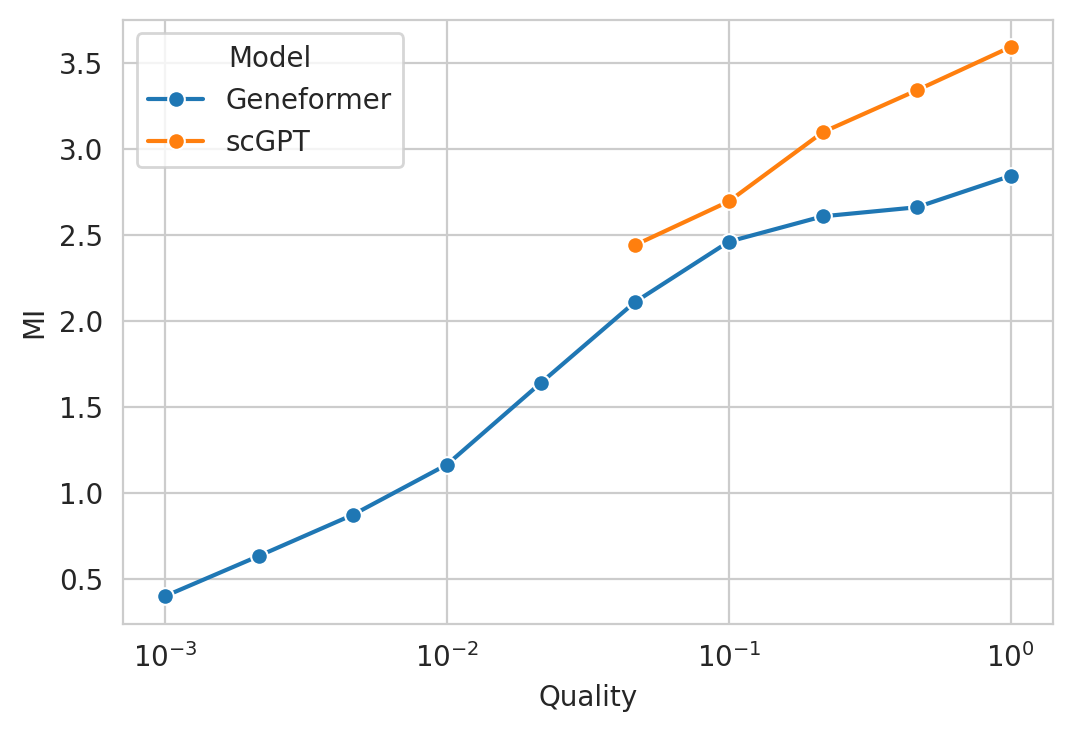

In [6]:
rcParams['figure.dpi'] = 200
df = pd.read_csv("../results/PBMC_CITEseq_inference_time_scaling.csv", index_col=0)
sns.set_style('whitegrid')
sns.lineplot(data=df, x='Quality', y='MI', hue='Model',
             marker='o')
plt.xscale('log')